In [1]:
%matplotlib inline

import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

In [2]:
# Read CSV
rawdata = pd.read_csv('../data/housing.csv')

In [3]:
rawdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
rawdata.shape

(1460, 81)

In [5]:
#check for null values in raw data
rawdata.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
#drop columns with null values of more than 100
rawdata.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1, inplace = True)

In [7]:
rawdata.shape

(1460, 75)

C:\Users\bubuj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


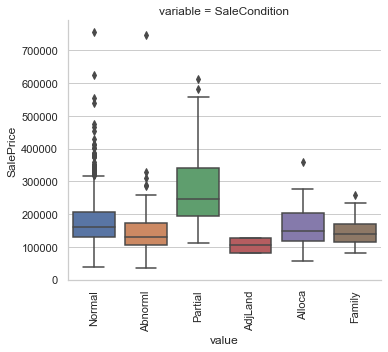

In [8]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

p = pd.melt(rawdata, id_vars='SalePrice', value_vars='SaleCondition')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [9]:
housing = rawdata[rawdata['SaleCondition'] == 'Normal']

In [10]:
housing.shape

(1198, 75)

In [11]:
#Check for null values
housing.isnull().sum().sort_values(ascending = False)[:15]

GarageType      61
GarageYrBlt     61
GarageFinish    61
GarageCond      61
GarageQual      61
BsmtExposure    33
BsmtFinType2    33
BsmtFinType1    32
BsmtCond        32
BsmtQual        32
MasVnrType       4
MasVnrArea       4
Electrical       1
RoofMatl         0
RoofStyle        0
dtype: int64

In [12]:
#check why 61 garage-related variables are null
housing[pd.isna(housing['GarageType'])].filter(items = ['GarageCars', 'GarageArea', 'GarageType','GarageYrBlt','GarageFinish','GarageCond','GarageQual']).T

,78,89,99,108,125,127,140,148,155,163,...,1218,1257,1283,1323,1325,1326,1337,1349,1407,1450
GarageCars,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageArea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GarageType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageFinish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#check basement-related variables are null
housing[pd.isna(housing['BsmtExposure'])].filter(items = ['TotalBsmtSF', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual']).T    

,17,90,156,182,259,342,362,371,392,520,...,1035,1045,1048,1090,1179,1216,1218,1232,1321,1412
TotalBsmtSF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BsmtExposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinType2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#fill the NaN as N/A as these represent not applicable categories
housing.fillna('N/A')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,11,20,RL,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500
12,13,20,RL,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,144000


In [15]:
housing.shape

(1198, 75)

In [16]:
housing['SalePrice'].describe()

count      1198.000000
mean     175202.219533
std       69713.636280
min       39300.000000
25%      130000.000000
50%      160000.000000
75%      205000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [17]:
IQR = 205000 + 1.5 * (205000-130000)
print(IQR)

317500.0


In [18]:
OutlierData = housing[housing['SalePrice'] > 317500 ]
housing.drop(OutlierData.index, inplace=True, axis=0)

C:\Users\bubuj\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
housing.shape

(1150, 75)

In [20]:
housing.drop(['SalePrice'] > 317500,axis = 1, inplace = True)

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
sns.boxplot(x=housing['SalePrice'])

In [ ]:
#visualising sale price
sns.distplot(housing['SalePrice'])
print ("The skewness of SalePrice is {}".format(housing['SalePrice'].skew()))

In [ ]:
#separate variables into new data frames
numeric_data = housing.select_dtypes(include=[np.number])
cat_data = housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in the housing data".format(numeric_data.shape[1],cat_data.shape[1]))

In [ ]:
numeric_data.head(5)

In [ ]:
del numeric_data['Id']

In [ ]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, linewidths = 1)

In [ ]:
print(numeric_data.dtypes)

In [ ]:
#print the strongest positive and negative correlated variables with Sale Price
print(housing.corr()['SalePrice'].sort_values(ascending = False)[:15])
print ('----------------------')
print(housing.corr()['SalePrice'].sort_values(ascending = True)[:10])

In [ ]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='KitchenQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [ ]:
p = pd.melt(rawdata, id_vars='SalePrice', value_vars='ExterQual')
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [ ]:
#assess correlation between GrLivArea and TotRmsAbvGrd    
sns.jointplot(x=housing['GrLivArea'], y=housing['TotRmsAbvGrd'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotRmsAbvGrd'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
#assess correlation between GrLivArea and TotalBsmtSF
sns.jointplot(x=housing['GrLivArea'], y=housing['TotalBsmtSF'])
corr, _ = pearsonr(housing['GrLivArea'], housing['TotalBsmtSF'])
print('Pearsons correlation: %.3f' % corr)

In [ ]:
#Strongest correlated variable is OverallQual. let's check the mean price per quality.
pivot = housing.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

In [ ]:
#Second strongest correlated variable is GrLivArea. Let's plot its relationship to the Sale Price
sns.jointplot(x=housing['GrLivArea'], y=housing['SalePrice'])

In [ ]:
#For GarageCars variable, let's check the mean price as the number of carspots increase.
pivot = housing.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

In [ ]:
#How about by Garage Area?
sns.jointplot(x=housing['GarageArea'], y=housing['SalePrice'])

In [ ]:
#assess the FullBath variable
housing['FullBath'].unique()
pivot = housing.pivot_table(index='FullBath', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

In [ ]:
#assess the nubmer of rooms above grade
housing['TotRmsAbvGrd'].unique()
pivot = housing.pivot_table(index='TotRmsAbvGrd', values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='red')

In [ ]:
#Use ANOVA to see how categorical variables influence the Hous Price
cat = [f for f in housing.columns if housing.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = housing.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt

In [ ]:
#create numeric plots
num = [f for f in housing.columns if housing.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(housing, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

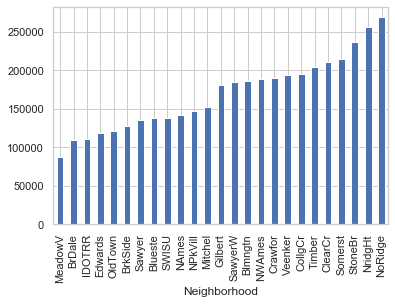

In [22]:
housing['SalePrice'].groupby(housing['Neighborhood']).median().sort_values().plot(kind='bar')

In [25]:
neighborhoodlist = housing['Neighborhood'].unique().tolist()

In [38]:
Neighborhoodmedian_dict = {}

for name in neighborhoodlist:
    
    n_median = housing[housing['Neighborhood'] == name]['SalePrice'].median()
    
    if n_median > 230000:
        median_dict[name] = 'High'
    elif n_median < 160000:
        median_dict[name] = 'Low'
    else:
         median_dict[name] = 'Med'
        
housing['DUMneighborhood'] = housing['Neighborhood'].map(median_dict)

In [41]:
dummies = pd.get_dummies(housing['DUMneighbhorhood'],prefix = 'neighborhood')
housing = housing.join(dummies)

ValueError: columns overlap but no suffix specified: Index(['neighborhood_High', 'neighborhood_Low'], dtype='object')

In [35]:
dummies.head(4)

,neighborhood_High,neighborhood_Low,neighborhood_Medium
0,0,0,1
1,0,0,1
2,0,0,1
4,1,0,0


In [32]:
# set target variable for linear regression
y = housing['SalePrice']

In [33]:
# set predictor variables
X = housing[['neighborhood_High','neighborhood_Med','neighborhood_Low','OverallQual', 'GrLivArea', 'GarageArea','FullBath','TotRmsAbvGrd','YearBuilt']]

KeyError: "['neighborhood_Med'] not in index"

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [ ]:
# Create a model for Linear Regression
linreg = LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
print('Rsquared for training data:', round(linreg.score(X_train, y_train),2))

# Calculate the score (R^2 for Regression) for Testing Data
print('Rsquared for testing data:', round(linreg.score(X_test, y_test),5))

In [ ]:
intercept = linreg.intercept_
print('intercept: ', round(intercept,5))
coeff = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])  
coeff

In [ ]:
#make predictions on the test data
y_pred = linreg.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))